In [1]:
from sqlalchemy import create_engine, text, inspect, func
import sqlite3

# ORM imports
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Float, Boolean
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base

# API
import requests
import json

# Data Science and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import datetime as dt

## Automapping the Bases

In [2]:
# Create engine using the `f1.sqlite` database file
engine = create_engine("sqlite:///f1.sqlite")

In [3]:
# Create a base using `automap_base()` for reflection
Base = automap_base()

# Use the Base class to reflect the tables in the Hawaii Database
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['drivers', 'results', 'constructors', 'races', 'circuits']

In [4]:
# Save references to the classes
Circuits = Base.classes.circuits
Constructors = Base.classes.constructors
Drivers = Base.classes.drivers
Results = Base.classes.results
Races = Base.classes.races



In [5]:
# Create a session
session = Session(engine)

## Charts

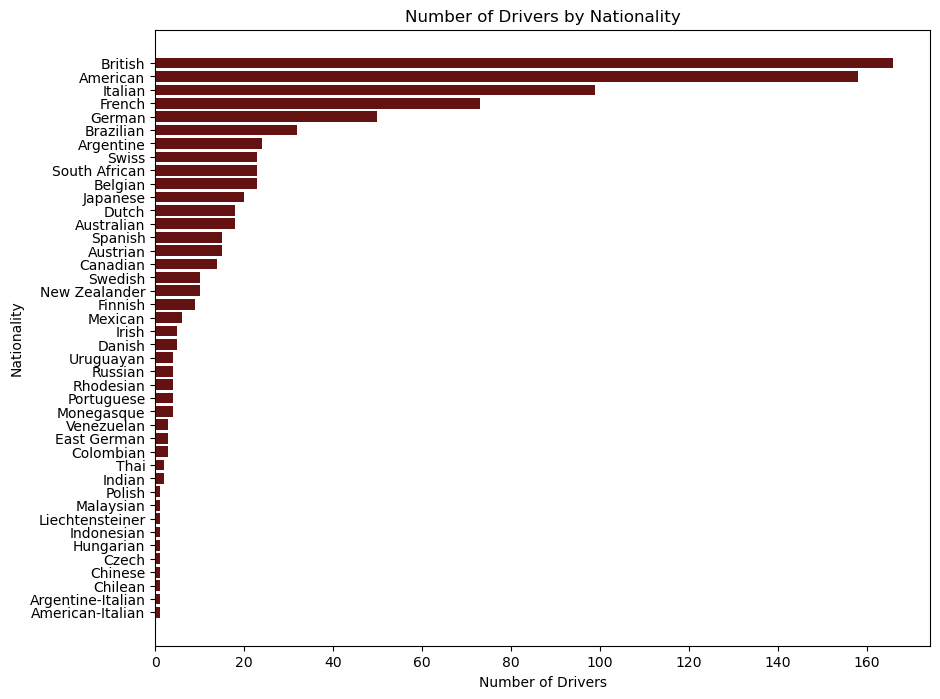

In [6]:
## Horizontal Bar Chart showing the nationalities of the drivers

driver_nationalities = session.query(Drivers.nationality, func.count(Drivers.nationality)).group_by(Drivers.nationality).order_by(func.count(Drivers.nationality).asc()).all()

nationalities = [data[0] for data in driver_nationalities]
driver_counts = [data[1] for data in driver_nationalities]

plt.figure(figsize=(10, 8))
plt.barh(nationalities, driver_counts, color='#641211')
plt.xlabel('Number of Drivers')
plt.ylabel('Nationality')
plt.title('Number of Drivers by Nationality')
plt.show()

In [7]:
## Possible areas of additional cleaning:

## East Germany into Germany
## Rhodesian become Zimbabwe
## Argentine-Italian and American-Italian in their respective countries

In [8]:
nationality = 'Argentine'

driver_query = session.query(Drivers.forename, Drivers.surname, func.count(Results.position)).\
filter(Drivers.driverId == Results.driverId).\
filter(Results.position==1).filter(Drivers.nationality == f"{nationality}").\
group_by(Drivers.forename, Drivers.surname).order_by(func.count(Results.position).asc()).all()

display(driver_query)

df = pd.DataFrame(driver_query, columns=["forename", "surname", "wins"])

[('José Froilán', 'González', 2),
 ('Carlos', 'Reutemann', 12),
 ('Juan', 'Fangio', 24)]

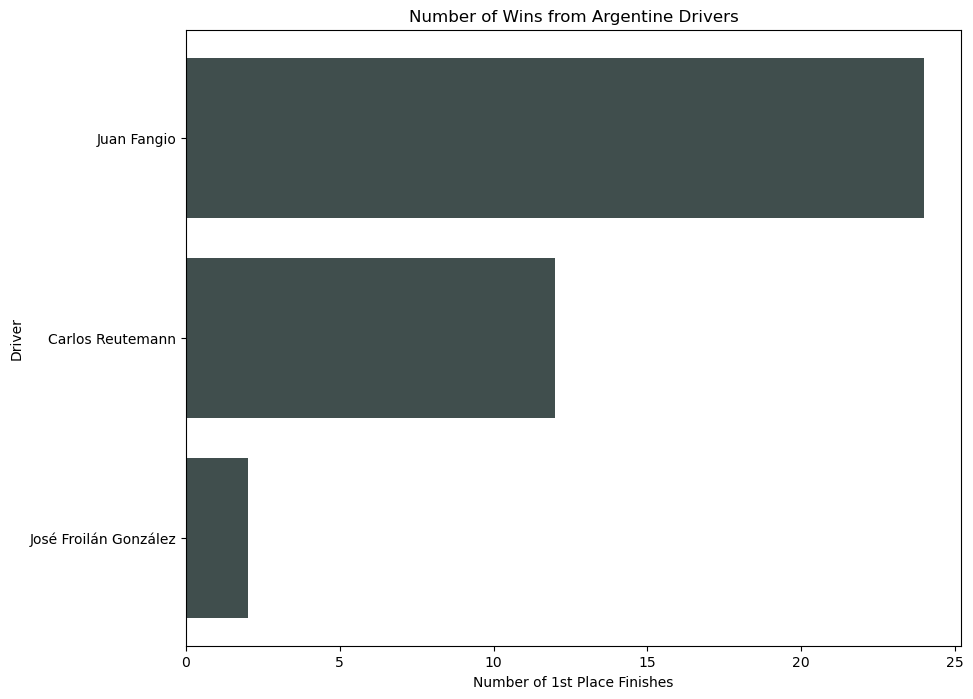

In [9]:
name = [data[0] + " " + data[1] for data in driver_query]
num_of_1st = [data[2] for data in driver_query]

# Create a horizontal bar chart using Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(name, num_of_1st, color='#404E4D')
plt.xlabel('Number of 1st Place Finishes')
plt.ylabel('Driver')
plt.title(f'Number of Wins from {nationality} Drivers')
plt.show()

In [10]:
nationality = 'Argentine'

driver_query = session.query(Drivers.forename, Drivers.surname, func.count(Results.position)).\
    filter(Drivers.driverId == Results.driverId).\
    filter(Results.position==1).filter(Drivers.nationality == f"{nationality}").\
    group_by(Drivers.forename, Drivers.surname).order_by(func.count(Results.position).asc()).all()

display(driver_query)

df = pd.DataFrame(driver_query, columns=["forename", "surname", "wins"])

[('José Froilán', 'González', 2),
 ('Carlos', 'Reutemann', 12),
 ('Juan', 'Fangio', 24)]

In [11]:
map_query = session.query(Circuits.name, Circuits.location, Circuits.country, Circuits.lat, Circuits.lng).all()

df3 = pd.DataFrame(map_query, columns=["Circuit Name", "City", "Country", "Latitude", "Longitude"])

df3.head()

Circuit Name          City    Country  Latitude  \
0  Albert Park Grand Prix Circuit     Melbourne  Australia -37.84970   
1    Sepang International Circuit  Kuala Lumpur   Malaysia   2.76083   
2   Bahrain International Circuit        Sakhir    Bahrain  26.03250   
3  Circuit de Barcelona-Catalunya      Montmeló      Spain  41.57000   
4                   Istanbul Park      Istanbul     Turkey  40.95170   

   Longitude  
0  144.96800  
1  101.73800  
2   50.51060  
3    2.26111  
4   29.40500

In [12]:
dropdown_query = session.query(Drivers.nationality.distinct()).order_by(Drivers.nationality.asc()).all()

df4 = pd.DataFrame(dropdown_query, columns=["Nationality"])
df4.head()

Nationality
0           American
1   American-Italian
2          Argentine
3  Argentine-Italian
4         Australian

In [13]:
#bubble chart
# drivers
# number of races x
# average finishing position y

nationality = 'American'

bubble_query = session.query(Drivers.forename, Drivers.surname, func.count(Results.position), func.avg(Results.position), Drivers.nationality).\
    filter(Drivers.driverId == Results.driverId).\
    filter(Drivers.nationality == f"{nationality}").\
    group_by(Drivers.forename, Drivers.surname).\
    order_by(func.count(Results.position).desc()).all()


df5 = pd.DataFrame(bubble_query, columns=["forename", "surname", "Number of Races", "Average Finish", "Nationality"])
df5.head()

forename   surname  Number of Races  Average Finish Nationality
0    Mario  Andretti               62        5.709677    American
1    Eddie   Cheever               55        7.545455    American
2      Dan    Gurney               44        5.295455    American
3   Richie   Ginther               39        5.282051    American
4     Phil      Hill               33        5.151515    American

In [14]:
race_query = session.query(Races.name, Circuits.name, Circuits.country, Races.year, Races.date, Races.round, Constructors.name, Drivers.forename, Drivers.surname, Results.position, Results.rank).\
    filter(Constructors.constructorId == Results.constructorId).\
    filter(Drivers.driverId == Results.driverId).\
    filter(Circuits.circuitId == Races.circuitId).\
    filter(Races.raceId == Results.raceId).\
    order_by(Races.year.desc()).\
    order_by(Races.date.asc()).\
    order_by(Results.points.desc()).all()

#save query to dataframe
df6 = pd.DataFrame(race_query, columns=["race", "circuit", "country", "year", "date", "round", "constructor", "driver_first", "driver_last", "position", "rank"])
df6.head()

race                        circuit  country  year  \
0  Bahrain Grand Prix  Bahrain International Circuit  Bahrain  2024   
1  Bahrain Grand Prix  Bahrain International Circuit  Bahrain  2024   
2  Bahrain Grand Prix  Bahrain International Circuit  Bahrain  2024   
3  Bahrain Grand Prix  Bahrain International Circuit  Bahrain  2024   
4  Bahrain Grand Prix  Bahrain International Circuit  Bahrain  2024   

         date  round constructor driver_first driver_last position rank  
0  2024-03-02      1    Red Bull          Max  Verstappen        1    1  
1  2024-03-02      1    Red Bull       Sergio       Pérez        2    4  
2  2024-03-02      1     Ferrari       Carlos       Sainz        3    6  
3  2024-03-02      1     Ferrari      Charles     Leclerc        4    2  
4  2024-03-02      1    Mercedes       George     Russell        5   12

In [15]:
constructor_query = session.query(Constructors.name, Drivers.forename, Drivers.surname).\
    filter(Constructors.constructorId == Results.constructorId).\
    filter(Drivers.driverId == Results.driverId).\
    order_by(Constructors.name.asc()).all()

#save query to dataframe
df7 = pd.DataFrame(constructor_query, columns=["constructor", "driver_first", "driver_last"])
df7.head()

constructor driver_first driver_last
0         AFM         Hans   von Stuck
1         AFM       Helmut  Niedermayr
2         AGS     Gabriele    Tarquini
3         AGS      Yannick      Dalmas
4         AGS     Gabriele    Tarquini

In [16]:
# Close session and end engine
session.close()
engine.dispose()